In [150]:
import io
import nltk
def get_unigrams(file_name):
    unigrams = {}
    with io.open(file_name, encoding='utf8', errors='ignore') as f:
        for line in f:
            tokens = line.strip().split()
            
            
            for token in tokens:
                token = token.lower()
                try:
                    unigrams[token]
                except:
                    unigrams[token] = 0
                unigrams[token] += 1
                
           
    return unigrams

def index_unigrams(unigrams):
    new_unigrams = {}
    reverse_unigrams = {}
    for index, unigram in enumerate(unigrams):
        new_unigrams[unigram] = index
        reverse_unigrams[index] = unigram
    return new_unigrams, reverse_unigrams
            


In [152]:
file_name = "sample_corpus.txt"

unigrams = get_unigrams(file_name)
vocab_size=len(unigrams)

#Tag first 5000 sentences

iunigrams,runigrams = index_unigrams(unigrams)
#iunigrams->Input-word output output->index
#runigrams->input=index output->word
#print(pos_tags['is'])
unigrams = sorted(unigrams.items(), key = lambda x: x[1], reverse = True )
from pprint import pprint


#pprint.pprint(iunigrams) # Figure out non-stop words
dimensions = [x[0] for x in unigrams[100:3100]] #Input->index output-> dimension field name

idimensions = {x: index for index, x in enumerate(dimensions)} #Input->dimension field name output->index


#For 1.2.3 update the dimensional matrix also such that only verbs are in the dimensional array
#Commnet the last 3 lines part if this is not 1.2.3



In [153]:
import numpy
cmatrix = numpy.memmap("lsa.cmatrix", dtype='float32', mode='w+', shape=(len(unigrams),len(dimensions)))
print(cmatrix.shape)

(43124, 3000)


In [154]:
def populate_cmatrix(file_name, cmatrix, iunigrams, dimensions, window = 5):
     e = 0
     s = 0
     with open(file_name, encoding='utf-8', errors='ignore') as f:
        for index, line in enumerate(f):             
            tokens = line.strip().split()
            for indexj, token in enumerate(tokens):
                token = token.lower()
                lcontext = tokens[indexj - window:indexj]
                rcontext = tokens[indexj + 1:index + window]
                context = [tok.lower() for tok in lcontext + rcontext]
                
                try:
                    unigram_index = iunigrams[token]                    
                    for d in context:
                        
                        if d in dimensions:
                            j = dimensions[d]
                            cmatrix[unigram_index][j] += 1 
                            s += 1
                except:
                    e += 1
            
            
     print(e,s)

#For 1.2.2 considering the total dimension size=3000 
def populate_cmatrix1(file_name, cmatrix, iunigrams, dimensions, window = 2):
     e = 0
     s = 0
     with open(file_name, encoding='utf-8', errors='ignore') as f:
        for index, line in enumerate(f):             
            tokens = line.strip().split()
            for indexj, token in enumerate(tokens):
                token = token.lower()
                lcontext = tokens[indexj - window:indexj]
                rcontext = tokens[indexj + 1:index + window]
                context = [tok.lower() for tok in lcontext ]
                
                try:
                    unigram_index = iunigrams[token]                    
                    for d in context:
                        
                        if d in dimensions[:1500]:
                            j = dimensions[d]
                            cmatrix[unigram_index][j] += 1 
                            s += 1
                except:
                    e += 1
                context = [tok.lower() for tok in rcontext ]
                
                try:
                    unigram_index = iunigrams[token]                    
                    for d in context:
                        
                        if d in dimensions[1500:3000]:
                            j = dimensions[d]
                            cmatrix[unigram_index][j] += 1 
                            s += 1
                except:
                    e += 1
            
            
     print(e,s)
                
                

In [155]:
from time import time
s = time()
populate_cmatrix(file_name, cmatrix, iunigrams, idimensions)
e = time()
print(e -s)

0 4459162
28.54332447052002


In [156]:
w1 = 'eat'
w2 = 'drink'
w3 = 'print'
id1 = iunigrams[w1]
id2 = iunigrams[w2]
id3 = iunigrams[w3]
print(id1, id2, id3)
v1 = cmatrix[id1]
v2 = cmatrix[id2]
v3 = cmatrix[id3]

print(v1, v2, v3)

from scipy.spatial.distance import *
print(euclidean(v1, v2))
print(cosine(v1,v2))
print(cosine(v1,v3))

4330 14646 41476
[ 0.  0.  0. ...,  0.  0.  0.] [ 0.  0.  1. ...,  0.  0.  0.] [ 0.  0.  0. ...,  0.  0.  0.]
18.947296142578125
0.819242849946
0.926176697016


In [157]:
from sklearn.decomposition import TruncatedSVD
s = time()
svd = TruncatedSVD(n_components=100, random_state=42)
svd.fit(cmatrix)
twod_cmatrix = svd.transform(cmatrix)
e = time()
print(e - s )

8.972512483596802


In [169]:
#For part 2.1
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=34).fit(twod_cmatrix)
count={}
for x in kmeans.labels_:
    if x in count:
        count[x]+=1
    else:
        count[x]=1
for x in range(20):
    print("For ",x)
    if x in count:
        print(count[x])

For  0
42714
For  1
1
For  2
1
For  3
1
For  4
2
For  5
1
For  6
3
For  7
1
For  8
2
For  9
7
For  10
2
For  11
31
For  12
1
For  13
2
For  14
15
For  15
1
For  16
8
For  17
29
For  18
299
For  19
3


In [149]:


v1_2d, v2_2d = twod_cmatrix[id1], twod_cmatrix[id2]

id3 = iunigrams[w3]
v3_2d = twod_cmatrix[id3]
print(v1_2d, v2_2d, v3_2d)
print(cosine(v1_2d, v2_2d), cosine(v1_2d, v3_2d))

#Word=boy
for word in (['boy','sunday','eat','good','slowly','100']):
    print("For"+word) 
    
    idx=iunigrams[word]
    v=twod_cmatrix[idx]
    val=[]
    for i in range(vocab_size):
        val.append(cosine(v,twod_cmatrix[i]))
    val=np.array(val)
    similar=(val.argsort()[:11])

    #print(cosine(twod_cmatrix[iunigrams['boy']],twod_cmatrix[iunigrams['boy']]))
    for i in similar:
        print(runigrams[i])
    
    print("\n"+"\n")
    


[  5.57798862e+00  -7.79794812e-01  -1.59795880e-01   2.87500715e+00
  -6.09497011e-01   1.53511298e+00  -8.23319703e-03  -6.33508742e-01
  -5.77176027e-02   2.40408868e-01  -1.04503679e+00   5.09238601e-01
   4.79120463e-01  -8.08255374e-01  -1.73826702e-02  -6.25795364e-01
   2.75382027e-02   5.75721383e-01   4.70615715e-01   2.60079324e-01
  -4.91318136e-01  -2.50094056e-01  -4.48523641e-01  -4.03545052e-03
  -1.22169591e-01   5.57961501e-02   2.13575721e-01  -9.33021009e-01
  -3.28391910e-01  -5.70616364e-01  -1.75434172e-01   5.64612329e-01
  -4.28558946e-01   2.87715167e-01   3.03842574e-02   7.02139974e-01
   2.48026699e-01  -4.34328258e-01   9.53170732e-02  -1.79223165e-01
   1.86955154e-01  -2.29990065e-01   1.57383457e-01   4.68376964e-01
  -4.55537826e-01   1.39054388e-01  -1.93539798e-01   5.08847713e-01
  -2.48114690e-01  -5.48668265e-01  -4.45635259e-01   1.95706278e-01
   6.95523769e-02  -3.60947222e-01   2.15142250e-01   7.61966348e-01
   3.27412248e-01   1.43805653e-01

/home/imkaushik/.local/lib/python3.5/site-packages/scipy/spatial/distance.py:644: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


boy
hang
sought
daughter
wood
tenderly
bonny
hood
saw
fore
robin



Forsunday
sunday
june
big
months
old
read
event
see
about
's
lord



Foreat
eat
talk
see
waiting
try
said
sometimes
says
memory
like
band



Forgood
good
but
it
while
very
so
that
too
even
something
one



Forslowly
slowly
21st
radiator
inaccurate
capitalism
captain
1925
built
shift
1990
stressed



For100
100
centimetres
decimeter
decimetres
millimetres
sq.
ares
decametre
decametres
centimetre
hectometre





Populating the interactive namespace from numpy and matplotlib
[array([ 0.9686178 , -0.1163898 ,  0.20864812, -0.05970683, -0.03367364], dtype=float32), array([ 0.97843516, -0.12518713, -0.06744414, -0.13931867,  0.05508611], dtype=float32), array([ 0.96830696, -0.09162664,  0.00430138,  0.20521395, -0.10888018], dtype=float32)]


/home/imkaushik/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


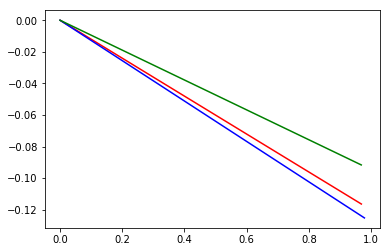

In [37]:
%pylab inline
import matplotlib.pyplot as plt
v1_2d = v1_2d / numpy.linalg.norm(v1_2d)
v2_2d = v2_2d / numpy.linalg.norm(v2_2d)
v3_2d = v3_2d / numpy.linalg.norm(v3_2d)
print ([v1_2d, v2_2d,v3_2d])
colors = ['r','b','g']
fig, axs = plt.subplots(1,1)
for i, x in enumerate([v1_2d, v2_2d,v3_2d]):
    a = plt.plot([0,x[0]],[0,x[1]],colors[i]+'-')
plt.show()